<a href="https://colab.research.google.com/github/nhatboi154/AI/blob/main/traicay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [2]:
kieuhinh=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [3]:
training_data=kieuhinh.flow_from_directory('/content/drive/MyDrive/baitapai3/traicay/training',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 299 images belonging to 10 classes.


In [4]:
validation_data=kieuhinh.flow_from_directory('/content/drive/MyDrive/baitapai3/traicay/valudation',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 10 images belonging to 10 classes.


In [5]:
training_data.class_indices

{'bo': 0,
 'chuoi': 1,
 'dua': 2,
 'dudu': 3,
 'mit': 4,
 'nhan': 5,
 'oi': 6,
 'saurieng': 7,
 'thanhlong': 8,
 'xoai': 9}

In [6]:
model=Sequential()
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) # Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) # Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) # Tích chập 256 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 128)      0         
 2D)                                                    

In [7]:
opt = SGD(lr=0.01,momentum=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [8]:
history=model.fit(training_data,epochs=500,batch_size=200,verbose=1, validation_data=validation_data, callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

Epoch 1/500
10/10 [==============================] - 162s 14s/step - loss: 6.1979 - accuracy: 0.1304 - val_loss: 2.3032 - val_accuracy: 0.1000
Epoch 2/500
10/10 [==============================] - 2s 235ms/step - loss: 2.3074 - accuracy: 0.0936 - val_loss: 2.3043 - val_accuracy: 0.1000
Epoch 3/500
10/10 [==============================] - 2s 240ms/step - loss: 2.3107 - accuracy: 0.1037 - val_loss: 2.3032 - val_accuracy: 0.1000
Epoch 4/500
10/10 [==============================] - 2s 231ms/step - loss: 2.3031 - accuracy: 0.1104 - val_loss: 2.3024 - val_accuracy: 0.1000
Epoch 5/500
10/10 [==============================] - 2s 235ms/step - loss: 2.3030 - accuracy: 0.1003 - val_loss: 2.3011 - val_accuracy: 0.1000
Epoch 6/500
10/10 [==============================] - 2s 235ms/step - loss: 2.3023 - accuracy: 0.1037 - val_loss: 2.3009 - val_accuracy: 0.0000e+00
Epoch 7/500
10/10 [==============================] - 2s 236ms/step - loss: 2.3016 - accuracy: 0.1472 - val_loss: 2.3019 - val_accuracy: 0.

<function matplotlib.pyplot.show>

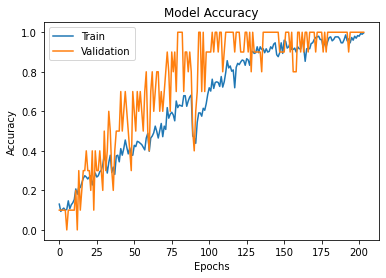

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [10]:
model.save("Nhan_dien_trai_cay.h5")

In [11]:
model_nhandien=load_model('Nhan_dien_trai_cay.h5')

bo


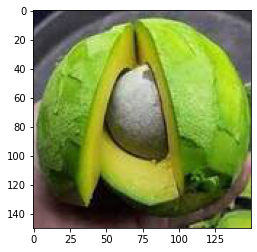

In [13]:
img=load_img("/content/drive/MyDrive/baitapai3/traicay/test/bo/1.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0])==1:
  prediction='bo'
if round(result[0][1])==1:
  prediction='chuoi'
if round(result[0][2])==1:
  prediction='dua'
if round(result[0][3])==1:
  prediction='dudu'
if round(result[0][4])==1:
  prediction='mit'
if round(result[0][5])==1:
  prediction='nhan'
if round(result[0][6])==1:
  prediction='oi'
if round(result[0][7])==1:
  prediction='saurieng'
if round(result[0][8])==1:
  prediction='thanhlong'
if round(result[0][9])==1:
  prediction='xoai'
print(prediction)

chuoi


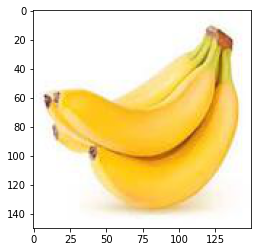

In [14]:
img=load_img("/content/drive/MyDrive/baitapai3/traicay/test/chuoi/1.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0])==1:
  prediction='bo'
if round(result[0][1])==1:
  prediction='chuoi'
if round(result[0][2])==1:
  prediction='dua'
if round(result[0][3])==1:
  prediction='dudu'
if round(result[0][4])==1:
  prediction='mit'
if round(result[0][5])==1:
  prediction='nhan'
if round(result[0][6])==1:
  prediction='oi'
if round(result[0][7])==1:
  prediction='saurieng'
if round(result[0][8])==1:
  prediction='thanhlong'
if round(result[0][9])==1:
  prediction='xoai'
print(prediction)

dua


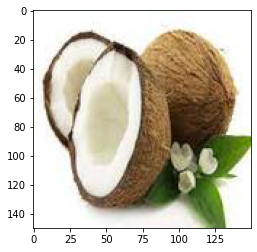

In [15]:
img=load_img("/content/drive/MyDrive/baitapai3/traicay/test/dua/1.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0])==1:
  prediction='bo'
if round(result[0][1])==1:
  prediction='chuoi'
if round(result[0][2])==1:
  prediction='dua'
if round(result[0][3])==1:
  prediction='dudu'
if round(result[0][4])==1:
  prediction='mit'
if round(result[0][5])==1:
  prediction='nhan'
if round(result[0][6])==1:
  prediction='oi'
if round(result[0][7])==1:
  prediction='saurieng'
if round(result[0][8])==1:
  prediction='thanhlong'
if round(result[0][9])==1:
  prediction='xoai'
print(prediction)

dudu


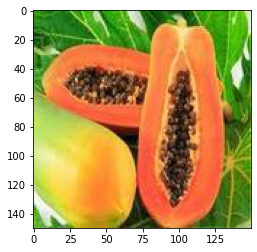

In [16]:
img=load_img("/content/drive/MyDrive/baitapai3/traicay/test/dudu/1.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0])==1:
  prediction='bo'
if round(result[0][1])==1:
  prediction='chuoi'
if round(result[0][2])==1:
  prediction='dua'
if round(result[0][3])==1:
  prediction='dudu'
if round(result[0][4])==1:
  prediction='mit'
if round(result[0][5])==1:
  prediction='nhan'
if round(result[0][6])==1:
  prediction='oi'
if round(result[0][7])==1:
  prediction='saurieng'
if round(result[0][8])==1:
  prediction='thanhlong'
if round(result[0][9])==1:
  prediction='xoai'
print(prediction)

mit


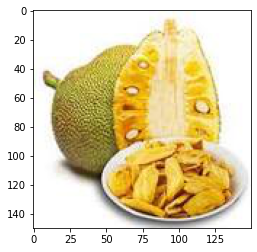

In [17]:
img=load_img("/content/drive/MyDrive/baitapai3/traicay/test/mit/1.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0])==1:
  prediction='bo'
if round(result[0][1])==1:
  prediction='chuoi'
if round(result[0][2])==1:
  prediction='dua'
if round(result[0][3])==1:
  prediction='dudu'
if round(result[0][4])==1:
  prediction='mit'
if round(result[0][5])==1:
  prediction='nhan'
if round(result[0][6])==1:
  prediction='oi'
if round(result[0][7])==1:
  prediction='saurieng'
if round(result[0][8])==1:
  prediction='thanhlong'
if round(result[0][9])==1:
  prediction='xoai'
print(prediction)

nhan


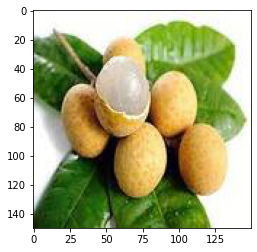

In [18]:
img=load_img("/content/drive/MyDrive/baitapai3/traicay/test/nhan/1.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0])==1:
  prediction='bo'
if round(result[0][1])==1:
  prediction='chuoi'
if round(result[0][2])==1:
  prediction='dua'
if round(result[0][3])==1:
  prediction='dudu'
if round(result[0][4])==1:
  prediction='mit'
if round(result[0][5])==1:
  prediction='nhan'
if round(result[0][6])==1:
  prediction='oi'
if round(result[0][7])==1:
  prediction='saurieng'
if round(result[0][8])==1:
  prediction='thanhlong'
if round(result[0][9])==1:
  prediction='xoai'
print(prediction)

oi


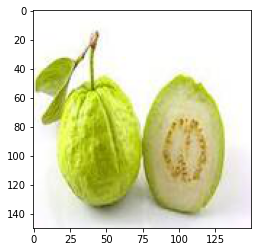

In [19]:
img=load_img("/content/drive/MyDrive/baitapai3/traicay/test/oi/1.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0])==1:
  prediction='bo'
if round(result[0][1])==1:
  prediction='chuoi'
if round(result[0][2])==1:
  prediction='dua'
if round(result[0][3])==1:
  prediction='dudu'
if round(result[0][4])==1:
  prediction='mit'
if round(result[0][5])==1:
  prediction='nhan'
if round(result[0][6])==1:
  prediction='oi'
if round(result[0][7])==1:
  prediction='saurieng'
if round(result[0][8])==1:
  prediction='thanhlong'
if round(result[0][9])==1:
  prediction='xoai'
print(prediction)

saurieng


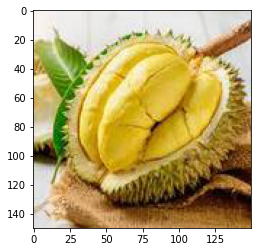

In [20]:
img=load_img("/content/drive/MyDrive/baitapai3/traicay/test/saurieng/1.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0])==1:
  prediction='bo'
if round(result[0][1])==1:
  prediction='chuoi'
if round(result[0][2])==1:
  prediction='dua'
if round(result[0][3])==1:
  prediction='dudu'
if round(result[0][4])==1:
  prediction='mit'
if round(result[0][5])==1:
  prediction='nhan'
if round(result[0][6])==1:
  prediction='oi'
if round(result[0][7])==1:
  prediction='saurieng'
if round(result[0][8])==1:
  prediction='thanhlong'
if round(result[0][9])==1:
  prediction='xoai'
print(prediction)

thanhlong


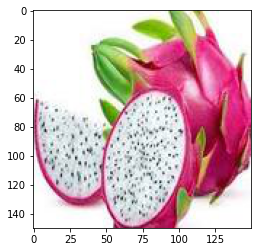

In [21]:
img=load_img("/content/drive/MyDrive/baitapai3/traicay/test/thanhlong/1.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0])==1:
  prediction='bo'
if round(result[0][1])==1:
  prediction='chuoi'
if round(result[0][2])==1:
  prediction='dua'
if round(result[0][3])==1:
  prediction='dudu'
if round(result[0][4])==1:
  prediction='mit'
if round(result[0][5])==1:
  prediction='nhan'
if round(result[0][6])==1:
  prediction='oi'
if round(result[0][7])==1:
  prediction='saurieng'
if round(result[0][8])==1:
  prediction='thanhlong'
if round(result[0][9])==1:
  prediction='xoai'
print(prediction)

xoai


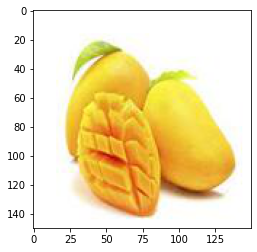

In [22]:
img=load_img("/content/drive/MyDrive/baitapai3/traicay/test/xoai/1.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0])==1:
  prediction='bo'
if round(result[0][1])==1:
  prediction='chuoi'
if round(result[0][2])==1:
  prediction='dua'
if round(result[0][3])==1:
  prediction='dudu'
if round(result[0][4])==1:
  prediction='mit'
if round(result[0][5])==1:
  prediction='nhan'
if round(result[0][6])==1:
  prediction='oi'
if round(result[0][7])==1:
  prediction='saurieng'
if round(result[0][8])==1:
  prediction='thanhlong'
if round(result[0][9])==1:
  prediction='xoai'
print(prediction)